[2 0] [3.00000000000000 4.00000000000000]
[2 0] [3.00000000000000 4.00000000000000]
tau [[ 2  1]
 [-1  1]]
lambda_j_k_ [[ 0.33333333 -0.33333333]
 [ 0.33333333  0.66666667]]
e_1_ [7.00000000000000 4.00000000000000]
e_2_ [1.00000000000000 4.00000000000000]
l_1_ 8.06225774829855
l_2_ 4.12310562561766
le_1_ 1.00778221853732
le_2_ 1.03077640640442
[4.00000000000000 7.00000000000000] [4.00000000000000 1.00000000000000]
[4.00000000000000 7.00000000000000] [4.00000000000000 1.00000000000000]
a1_, a2_ 0.3333333333333335 1.8333333333333333
2.666666666666668 7.333333333333333
'numpy.float64' object cannot be interpreted as an integer
'numpy.float64' object cannot be interpreted as an integer


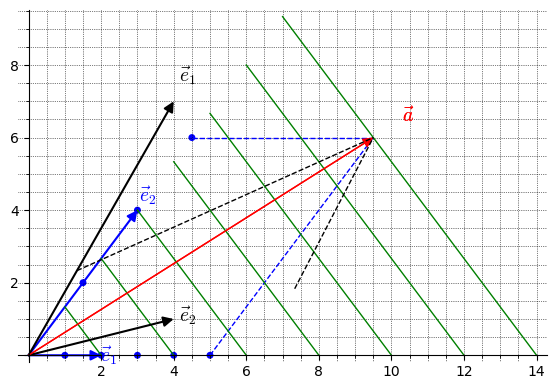

In [139]:
def draw_vectors_covectors():
    p = Graphics()
    import numpy as np

    tk = 1.1
    p0  = np.array([0, 0])

    # https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
    def line_intersection(line1, line2):
        xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
        ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        div = det(xdiff, ydiff)
        if div == 0:
            raise Exception('lines do not intersect')

        d = (det(*line1), det(*line2))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return np.array([x, y])
    
    def define_basic(le_1, ne_1, phi_e_1,
                     le_2, ne_2, phi_e_2):
        # define basic
        ie_1 = np.array([le_1*cos(phi_e_1), le_1*sin(phi_e_1)])
        ie_2 = np.array([le_2*cos(phi_e_2), le_2*sin(phi_e_2)])

        e_1 = ne_1*ie_1
        e_2 = ne_2*ie_2
        
        print(e_1, e_2)
        
        return ie_1, e_1, ie_2, e_2
    
    
    def draw_axes(p,
                  #basis 1
                  le_1, ne_1, phi_e_1,
                  le_2, ne_2, phi_e_2,
                  color = "blue"):
        
        # define basic
        ie_1, e_1, ie_2, e_2 = \
            define_basic(le_1, ne_1, phi_e_1,
                         le_2, ne_2, phi_e_2)

        # draw basic
        p += text ("$\\vec e_1$",
                   (e_1[0]*tk, e_1[1]*tk),
                   fontsize=14, color = color)
        p += arrow (p0, e_1, 
                   color = color, width = 1.5, arrowsize=3)
        
        p += text ("$\\vec e_2$",
                   (e_2[0]*tk, e_2[1]*tk),
                   fontsize=14, color = color)
        p += arrow (p0, e_2, 
                   color = color, width = 1.5, arrowsize=3)
        
        return p
        
    # draw vector a
    def draw_vector_a(p,
                      # vector
                      a,
                      # basis 1
                      ie_1, ne_1,
                      ie_2, ne_2,
                      a1, a2, color):


        p += text ("$\\vec a$", (a[0]*tk, a[1]*tk),
                   fontsize=14, color = "red")
        p += arrow (p0, a, color = "red", width = 1, arrowsize=3)

        # draw vector a coordinate points on the e1, e2 basis
        try:
            for i in range(1,a1*ne_1+1):
                p += point(i*ie_1, pointsize=25)
        except Exception as ex:
            print (ex)
        p += line([a1*(ne_1*ie_1), a], linestyle="dashed", color=color)

        try:
            for i in range(1,a2*ne_2+1):
                p += point(i*ie_2, pointsize=25)
        except Exception as ex:
            print (ex)
        p += line([a2*(ne_2*ie_2), a], linestyle="dashed", color=color)
        
        return p

    # covector
    def draw_covector(p,
                      # basis 1
                      e_1,
                      e_2,
                      # omega
                      omega_1, omega_2, 
                      covector_base_lines_number
                     ):

        covector_base_line = np.array([e_1/omega_1, e_2/omega_2])

        left_vertical_line = np.array([np.array([-1, 1]),
                                       np.array([-1, 0])])
        right_vertical_line = np.array([np.array([+10, 1]),
                                        np.array([+10, 0])])
        
        #p += line(left_vertical_line)
        
        for i in range(1,covector_base_lines_number+1):
            i_covector_line = i*covector_base_line
            
            #p += point(line_intersection(left_vertical_line, i_covector_line))
            #p += point(line_intersection(right_vertical_line, i_covector_line))
            
            #p += line([line_intersection(left_vertical_line, i_covector_line),
            #           line_intersection(right_vertical_line, i_covector_line)])
            #p += line([line_intersection(left_vertical_line, i_covector_line),
            #           i_covector_line[1]])
            
            p += line(i_covector_line, color = "green")
            
        return p

    #basis 1
    phi_e_1 = atan2(0,1)
    phi_e_2 = atan2(4,3)

    le_1 = 1
    le_2 = 2.5

    ne_1 = 2
    ne_2 = 2
    
    # define basic 1
    ie_1, e_1, ie_2, e_2 = \
        define_basic(le_1, ne_1, phi_e_1,
                     le_2, ne_2, phi_e_2)
    
    p = draw_axes(p, le_1, ne_1, phi_e_1,
                     le_2, ne_2, phi_e_2,
                  color = "blue")
    
    a1 = 5/2
    a2 = 3/2
    
    a = a1*e_1 + a2*e_2
    
    p = draw_vector_a(p,
                      # vector
                      a,
                      # basis 1
                      ie_1, ne_1,
                      ie_2, ne_2,
                      a1, a2, color = "blue")
    omega_1 = 1
    omega_2 = 3

    covector_base_lines_number = omega_1*a1 + omega_2*a2
        
    p = draw_covector(p,
                      # basis 1
                      e_1,
                      e_2,
                      # omega
                      omega_1, omega_2, 
                      covector_base_lines_number
                     )
    
    
    tau = np.array([[2, 1],
                   [-1,1]])
    
    print("tau", tau)
    
    lambda_j_k_ = np.linalg.inv(tau)
    
    print("lambda_j_k_", lambda_j_k_)
    
    
    
    e_1_ = np.array([tau[0][0] * e_1[0] + tau[0][1] * e_2[0],
                     tau[0][0] * e_1[1] + tau[0][1] * e_2[1]])
    
    e_2_ = np.array([tau[1][0] * e_1[0] + tau[1][1] * e_2[0],
                     tau[1][0] * e_1[1] + tau[1][1] * e_2[1]])
    
    print("e_1_", e_1_)
    print("e_2_", e_2_)
    

    #basis 2
    phi_e_1_ = atan2(e_1_[0],e_1_[1])
    phi_e_2_ = atan2(e_2_[0],e_2_[1])
    
    l_1_ = sqrt(e_1_[0]^2 + e_1_[1]^2)
    l_2_ = sqrt(e_2_[0]^2 + e_2_[1]^2)

    print("l_1_", l_1_)
    print("l_2_", l_2_)

    ne_1_ = 8
    ne_2_ = 4

    le_1_ = l_1_ / ne_1_
    le_2_ = l_2_ / ne_2_

    print("le_1_", le_1_)
    print("le_2_", le_2_)
    
    # define basic 1_
    ie_1_, e_1_, ie_2_, e_2_ = \
        define_basic(le_1_, ne_1_, phi_e_1_,
                     le_2_, ne_2_, phi_e_2_)

    
    p = draw_axes(p, le_1_, ne_1_, phi_e_1_,
                     le_2_, ne_2_, phi_e_2_,
                 color ="black")
    
    
    a1_ = lambda_j_k_[0][0] * a1 + lambda_j_k_[0][1] * a2
    a2_ = lambda_j_k_[1][0] * a1 + lambda_j_k_[1][1] * a2
    
    print("a1_, a2_", a1_, a2_)
    print(a1_*ne_1_, a2_*ne_2_)


    p = draw_vector_a(p, 
                      # vector
                      a,
                      # basis 1
                      ie_1_, ne_1_,
                      ie_2_, ne_2_,
                      a1_, a2_, color="black")

    return p

p = draw_vectors_covectors()

p.show(aspect_ratio = 1, gridlines='minor', axes=True)
p.save(filename="vectors_covectors.png", aspect_ratio = 1, axes=False)

# 1.1.5 Laws of transformation of vector and covector components

Let’s consider an arbitrary non-collinear set of vectors as some new basis,
which we will mark with a dot over the index $\vec e_{i′}$. Let these new basis vectors be
related to the “old” ones $\vec e_{j}$ according to the following law

\begin{equation}
\begin{array}{l}
\begin{array}{llr}
& \vec e_{i′} = \tau_{i′}^{j} \vec e_{j}, \\
\end{array} & (1.96)\\
\end{array}
\end{equation}

Then the old basis vectors $\vec e_{j}$ in terms of the new $\vec e_{i′}$ will be expressed as

\begin{equation}
\begin{array}{l}
\begin{array}{llr}
& \vec e_{i} = \lambda_{i}^{j′} \vec e_{j′}, \\
\end{array} & (1.96)\\
\end{array}
\end{equation}

Let us now consider the transformation of the coordinate system. Let the new
basis vectors \vec $e_{1′}$ , $\vec e_{2′}$ be expressed in terms of the old basis vectors as follows

\begin{equation}
\begin{array}{l} \bigg \{ &
\begin{array}{llr}
\vec e_{1′} = \tau_{1′}^{1} \cdot \vec e_{1} + \tau_{1′}^{2} \cdot \vec e_{2} \\
\vec e_{2′} = \tau_{2′}^{1} \cdot \vec e_{1} + \tau_{2′}^{2} \cdot \vec e_{2} \\
\end{array}. & (1.118 - 1.119)\\
\end{array}
\end{equation}

выразив базовые векторы через направляющие косинусы и синусы декартовой системы

\begin{equation}
\begin{array}{l}
\begin{array}{llr}
& \vec e_{1} = \left(l_{1} cos(\varphi_{1}), l_{1} sin(\varphi_{1})\right), \\
& \vec e_{2} = \left(l_{2} cos(\varphi_{2}), l_{2} sin(\varphi_{2})\right), \\
\end{array} & (2)\\
\end{array}
\end{equation}

\begin{equation}
\begin{array}{l}
\begin{array}{llr}
& \vec e_{1′} = \left(l_{1′} cos(\varphi_{1′}), l_{1′} sin(\varphi_{1′})\right), \\
& \vec e_{2′} = \left(l_{2′} cos(\varphi_{2′}), l_{2′} sin(\varphi_{2′})\right), \\
\end{array} & (2)\\
\end{array}
\end{equation}

получаем


\begin{equation}
\begin{array}{l} \bigg \{ &
\begin{array}{llr}
\left(l_{1′} cos(\varphi_{1′}), l_{1′} sin(\varphi_{1′})\right) = \tau_{1′}^{1} \cdot \left(l_{1} cos(\varphi_{1}), l_{1} sin(\varphi_{1})\right) + \tau_{1′}^{2} \cdot \left(l_{2} cos(\varphi_{2}), l_{2} sin(\varphi_{2})\right) \\
\left(l_{2′} cos(\varphi_{2′}), l_{2′} sin(\varphi_{2′})\right) = \tau_{2′}^{1} \cdot \left(l_{1} cos(\varphi_{1}), l_{1} sin(\varphi_{1})\right) + \tau_{2′}^{2} \cdot \left(l_{2} cos(\varphi_{2}), l_{2} sin(\varphi_{2})\right) \\
\end{array}. & \\
\end{array}
\end{equation}

или покомпонентно, получается система из 4 уравнений с 4 неизвестными $l_{1′}, l_{2′}, \varphi_{1′}, \varphi_{2′}$


\begin{equation}
\begin{array}{l} \bigg \{ &
\begin{array}{llr}
\left(l_{1′} cos(\varphi_{1′}), \right) = \tau_{1′}^{1} \cdot \left(l_{1} cos(\varphi_{1}), \right) + \tau_{1′}^{2} \cdot \left(l_{2} cos(\varphi_{2}), \right) \\
\left(l_{2′} cos(\varphi_{2′}), )\right) = \tau_{2′}^{1} \cdot \left(l_{1} cos(\varphi_{1}), \right) + \tau_{2′}^{2} \cdot \left(l_{2} cos(\varphi_{2}), \right) \\
\end{array}. & \\
\end{array}
\end{equation}

\begin{equation}
\begin{array}{l} \bigg \{ &
\begin{array}{llr}
\left(, l_{1′} sin(\varphi_{1′})\right) = \tau_{1′}^{1} \cdot \left(, l_{1} sin(\varphi_{1})\right) + \tau_{1′}^{2} \cdot \left(, l_{2} sin(\varphi_{2})\right) \\
\left(, l_{2′} sin(\varphi_{2′})\right) = \tau_{2′}^{1} \cdot \left(, l_{1} sin(\varphi_{1})\right) + \tau_{2′}^{2} \cdot \left(, l_{2} sin(\varphi_{2})\right) \\
\end{array}. & \\
\end{array}
\end{equation}

или 


\begin{equation}
\begin{array}{l} \bigg \{ &
\begin{array}{llr}
\left(l_{1′} cos(\varphi_{1′}), \right) = \tau_{1′}^{1} \cdot \left(l_{1} cos(\varphi_{1}), \right) + \tau_{1′}^{2} \cdot \left(l_{2} cos(\varphi_{2}), \right) \\
\left(, l_{1′} sin(\varphi_{1′})\right) = \tau_{1′}^{1} \cdot \left(, l_{1} sin(\varphi_{1})\right) + \tau_{1′}^{2} \cdot \left(, l_{2} sin(\varphi_{2})\right) \\
\end{array}. & \\
\end{array}
\end{equation}

\begin{equation}
\begin{array}{l} \bigg \{ &
\begin{array}{llr}
\left(, l_{2′} sin(\varphi_{2′})\right) = \tau_{2′}^{1} \cdot \left(, l_{1} sin(\varphi_{1})\right) + \tau_{2′}^{2} \cdot \left(, l_{2} sin(\varphi_{2})\right) \\
\left(l_{2′} cos(\varphi_{2′}), )\right) = \tau_{2′}^{1} \cdot \left(l_{1} cos(\varphi_{1}), \right) + \tau_{2′}^{2} \cdot \left(l_{2} cos(\varphi_{2}), \right) \\
\end{array}. & \\
\end{array}
\end{equation}